In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
data_path = "../data/PARTS/"
output_path = '../data/PIC/'

In [3]:
X = pd.read_csv('../data/Overview.csv')
X

,subjectID,type,n_parts,total_samples,frame_time
0,01_1_Char00,norma,2.0,30060.0,0.008
1,03_1_Char00,ataxie,5.0,10482.0,0.008
2,04_1_Char00,norma,7.0,24964.0,0.008
3,06_1_Char00,norma,6.0,23941.0,0.008
4,07_1_Char00,norma,1.0,34820.0,0.008
5,740516_Char00,norma,6.0,13773.0,0.017
6,535525_Char00,norma,3.0,15432.0,0.017
7,736123_Char00,ataxie,3.0,15208.0,0.017
8,715211_Char00,ataxie,2.0,18705.0,0.017
9,766012_Char00,ataxie,1.0,19541.0,0.017


In [4]:
labels = ['Xposition', 'Yposition', 'Zposition', 'Yrotation', 'Xrotation', 'Zrotation']

In [5]:
text_file = open('../data/JointNames.txt', "r")
joint_names = text_file.read().split('\n')

In [6]:
def plot_ax(time,x,xf,joint,dim,subplot_pos1,subplot_pos2):
        ax[subplot_pos1,subplot_pos2].plot(time,x[joint,:,dim])
        #ax[subplot_pos1,subplot_pos2].plot(time,xf[joint,:,dim],'r')
        ax[subplot_pos1,subplot_pos2].set_xlabel('Time')
        ax[subplot_pos1,subplot_pos2].set_ylabel(labels[dim])
        #ax[subplot_pos1,subplot_pos2].set_title(joint_names[joint])

In [7]:
for subject in X['subjectID']:
    print(subject)
    for part in range(int(X.loc[X['subjectID'] == subject,'n_parts'])):        
        print(part)
    
        x = np.load(data_path + subject +'_raw_part' + str(part) + '.npy')
        x_filt = np.load(data_path + subject +'_filt_part' + str(part) + '.npy')
        
        fig,ax = plt.subplots(2,3,figsize = (16,9))
        time = np.linspace(0, np.size(x,axis=1),num=np.size(x,axis=1))*X.loc[X['subjectID'] == subject,'frame_time'].values

        for joint in range(0,59):
            plot_ax(time,x,x_filt,joint,0,0,0)
            plot_ax(time,x,x_filt,joint,1,0,1)
            plot_ax(time,x,x_filt,joint,2,0,2)

            plot_ax(time,x,x_filt,joint,3,1,0)
            plot_ax(time,x,x_filt,joint,4,1,1)
            plot_ax(time,x,x_filt,joint,5,1,2)
        
        plt.figlegend(labels = joint_names, loc = 'right',frameon= True)
#        plt.savefig(output_path + subject + "_part" + str(part) + '.png')
        plt.close(fig)
        break        
    break


01_1_Char00
0


In [8]:
def plot_ax(time,x,xf,joint,dim,subplot_pos1,subplot_pos2):
        ax[subplot_pos1,subplot_pos2].plot(time,x[joint,:,dim])
        ax[subplot_pos1,subplot_pos2].plot(time,xf[joint,:,dim],'r')
        ax[subplot_pos1,subplot_pos2].set_xlabel('Time')
        ax[subplot_pos1,subplot_pos2].set_ylabel(labels[dim])
        ax[subplot_pos1,subplot_pos2].set_title(joint_names[joint])

### Hips

Text(0.5, 1.0, 'SUM')

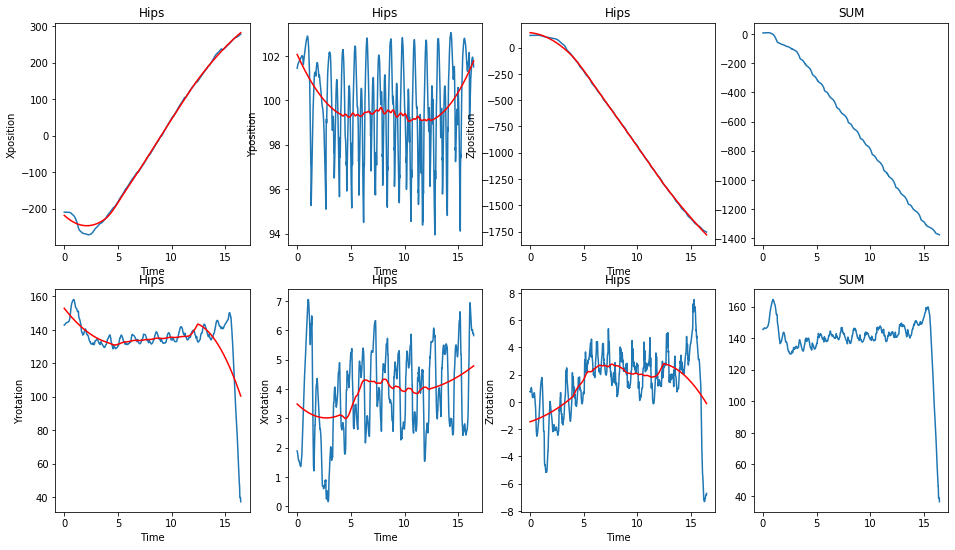

In [9]:
fig,ax = plt.subplots(2,4,figsize = (16,9))

plot_ax(time,x,x_filt,0,0,0,0)
plot_ax(time,x,x_filt,0,1,0,1)
plot_ax(time,x,x_filt,0,2,0,2)
ax[0,3].plot(time,np.sum(x[0,:,0:3],axis=1))
ax[0,3].set_title('SUM')

plot_ax(time,x,x_filt,0,3,1,0)
plot_ax(time,x,x_filt,0,4,1,1)
plot_ax(time,x,x_filt,0,5,1,2)
ax[1,3].plot(time,np.sum(x[0,:,3:6],axis=1))
ax[1,3].set_title('SUM')

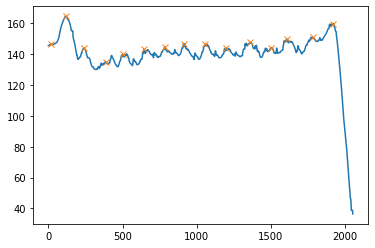

In [10]:
y = np.sum(x[0,:,3:6],axis=1)
peaks, _ = find_peaks(y,distance=100)

plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.show()

### Left leg

Text(0.5, 1.0, 'SUM')

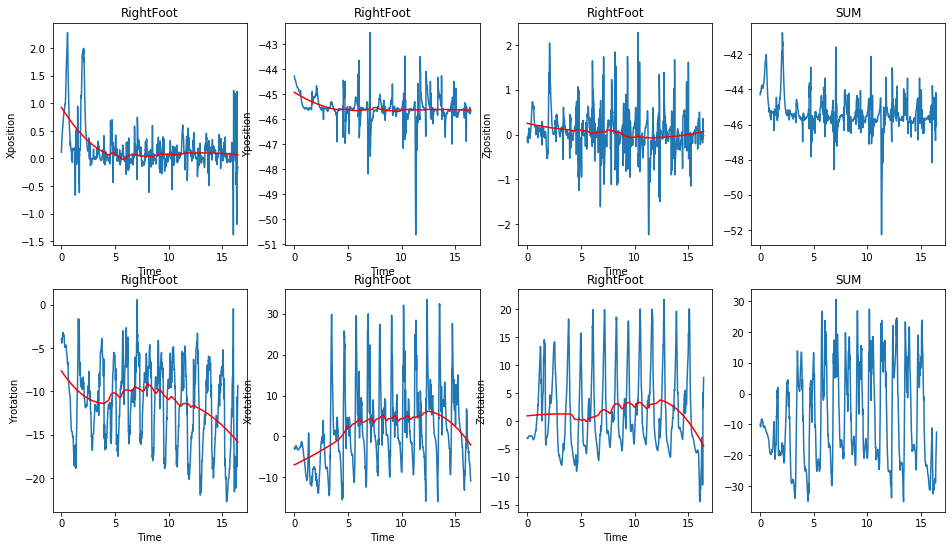

In [11]:
fig,ax = plt.subplots(2,4,figsize = (16,9))

plot_ax(time,x,x_filt,3,0,0,0)
plot_ax(time,x,x_filt,3,1,0,1)
plot_ax(time,x,x_filt,3,2,0,2)
ax[0,3].plot(time,np.sum(x[3,:,0:3],axis=1))
ax[0,3].set_title('SUM')

plot_ax(time,x,x_filt,3,3,1,0)
plot_ax(time,x,x_filt,3,4,1,1)
plot_ax(time,x,x_filt,3,5,1,2)
ax[1,3].plot(time,np.sum(x[3,:,3:6],axis=1))
ax[1,3].set_title('SUM')

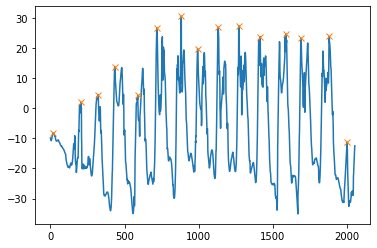

In [12]:
y = np.sum(x[3,:,3:6],axis=1)
peaks, _ = find_peaks(y,distance=100)

plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.show()

### Right leg

Text(0.5, 1.0, 'SUM')

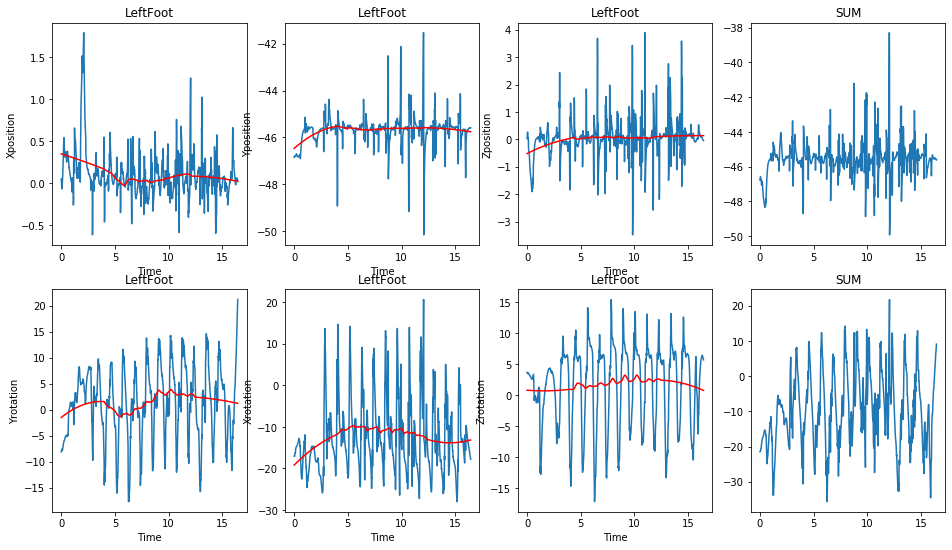

In [13]:
fig,ax = plt.subplots(2,4,figsize = (16,9))

plot_ax(time,x,x_filt,6,0,0,0)
plot_ax(time,x,x_filt,6,1,0,1)
plot_ax(time,x,x_filt,6,2,0,2)
ax[0,3].plot(time,np.sum(x[6,:,0:3],axis=1))
ax[0,3].set_title('SUM')

plot_ax(time,x,x_filt,6,3,1,0)
plot_ax(time,x,x_filt,6,4,1,1)
plot_ax(time,x,x_filt,6,5,1,2)
ax[1,3].plot(time,np.sum(x[6,:,3:6],axis=1))
ax[1,3].set_title('SUM')

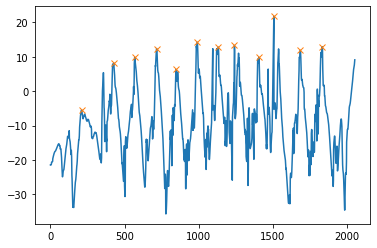

In [14]:
y = np.sum(x[6,:,3:6],axis=1)
peaks, _ = find_peaks(y,distance=100)

if len(peaks) > 4:
    peaks = peaks[1:-1]
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.show()

### corpus = hips + spine + neck + head

In [15]:
corpus_joints = [0,7,8,9,10,11,12]
corpus = np.zeros_like(x[len(corpus_joints),:,0])
for c in corpus_joints:
    tmp_x = np.sum(x[c,:,3:6],axis=1)
    corpus += tmp_x
corpus = corpus / len(corpus_joints)

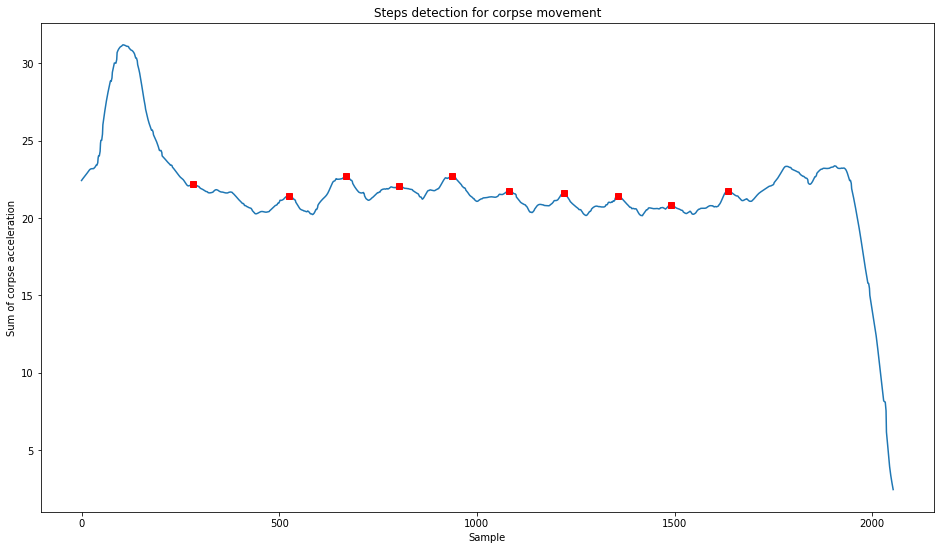

In [16]:
# Distance threshold for findpeaks = 1 second
T_sampling = X.loc[X['subjectID'] == subject,'frame_time'].values
TH_dist = 1 / T_sampling
peaks, _ = find_peaks(corpus,distance=TH_dist)

if len(peaks) > 4:
    peaks = peaks[1:-1]

fig = plt.figure(figsize=(16,9))
plt.plot(corpus)
plt.plot(peaks, corpus[peaks], "rs")
plt.xlabel('Sample')
plt.ylabel('Sum of corpse acceleration')
plt.title('Steps detection for corpse movement')


plt.show()

### Two-steps selection

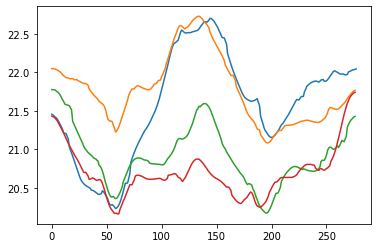

In [17]:
if len(peaks) % 2 == 0:
    peaks = peaks[1:]
for n in range(0,len(peaks)-1,2):
    tmp_x = corpus[peaks[n]:peaks[n+2]]
    plt.plot(tmp_x)

# Features in segments

In [18]:
def step_frequency(peaks,Ts):
    freq = []
    
    for n in range(0,len(peaks)-2):
        print(n)
        print(1/((peaks[n+2]-peaks[n])*Ts))
        
        freq.append(1/((peaks[n+2]-peaks[n])*Ts))        
    return np.mean(freq)

In [19]:
step_frequency(peaks,T_sampling)

0
[0.44964029]
1
[0.46641791]
2
[0.45126354]
3
[0.44326241]
4
[0.45126354]
5
[0.46296296]
6
[0.45126354]


0.4537248837494911